In [28]:
!pip3 install h5py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 6.8 MB/s eta 0:00:0000:0100:01
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.10/bin/python3.10 -m pip install --upgrade pip' command.


In [55]:
import pandas
import matplotlib.pyplot as plt
import h5py
import os
import glob
import numpy as np

In [56]:


train_data_path = '/Users/tylerklimas/Desktop/landslide/TrainData/img'
train_data = glob.glob(os.path.join(train_data_path, '*'))
mask_data_path = '/Users/tylerklimas/Desktop/landslide/TrainData/mask'
mask_data = glob.glob(os.path.join(mask_data_path, '*'))
train_data[1]

'/Users/tylerklimas/Desktop/landslide/TrainData/img/image_112.h5'

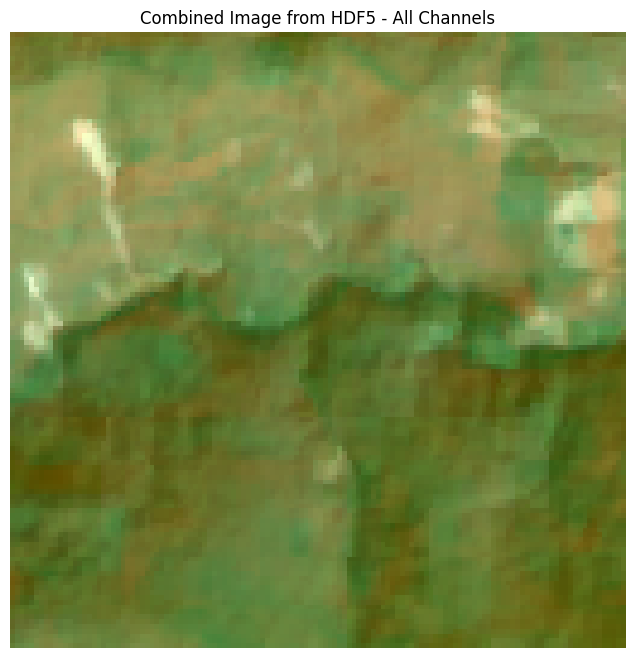

In [58]:
# Path to your HDF5 file
file_path = '/Users/tylerklimas/Desktop/landslide/TrainData/img/image_112.h5'

# Open the HDF5 file in read mode
with h5py.File(file_path, 'r') as f:
    # Assuming there's only one dataset containing image data
    # Access the dataset directly by name
    dataset_name = list(f.keys())[0]  # Assuming the first dataset is the image data
    dataset = f[dataset_name][:]
    
    # Combine all channels into a single image
    combined_image = np.zeros_like(dataset[:, :, 0:3], dtype=np.float32)  # Initialize with the first three channels
    for i in range(dataset.shape[2]):
        combined_image[:, :, i % 3] += dataset[:, :, i]  # Sum all channels modulo 3 (for RGB display)
    
    # Normalize the combined image to [0, 1]
    combined_image -= combined_image.min()
    combined_image /= combined_image.max()
    
    # Display the combined image using matplotlib
    plt.figure(figsize=(8, 8))
    plt.imshow(combined_image)
    plt.axis('off')
    plt.title('Combined Image from HDF5 - All Channels')
    plt.show()